In [1]:
import numpy as np
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### 1. numpy 및 scipy 라이브러리를 사용하여 아래의 코드를 작성하시오.

In [2]:
# 1-(a)
n = np.random.normal(size=500) # 정규분포 랜덤 500개

In [3]:
# 1-(b)
np.median(n) # 중앙값

-0.0009721591178949375

In [4]:
# 1-(c)
np.std(n) # 표준편차

0.9408665414674138

In [5]:
# 1-(d)
stats.scoreatpercentile(n, 80) # 상위 20% 값

0.7989822330382719

In [6]:
# 1-(e)
loc, std = stats.norm.fit(n) #
#np.mean(n)
#np.std(n)

#### 2. 주어진 행렬 arr 에 대하여 아래의 행렬 연산을 numpy 혹은 scipy 를 활용하여 구하시오.

In [7]:
# 2
from scipy import linalg

arr = np.array([[1,3,5],
                 [2,4,6],
                 [6,5,8]])

In [8]:
# 2-(a)
linalg.det(arr) # determinant

-7.999999999999992

In [9]:
# 2-(b)
linalg.inv(arr) # 역행렬

array([[-0.25 , -0.125,  0.25 ],
       [-2.5  ,  2.75 , -0.5  ],
       [ 1.75 , -1.625,  0.25 ]])

#### 3. 주어진 행렬 arr2의 determinant를 구하시오 . 오류가 발생한다면, 그 원인을 서술하시오.

In [10]:
# 3
arr2 = np.array([[1,2,3,4],
                 [3,8,5,2],
                 [4,3,6,2]])

#print(linalg.det(arr2))
'''
에러가 발생함
이유는 square matrix가 아닌 matrix에서는 determinant를 구할 수 없다.
'''

'\n에러가 발생함\n이유는 square matrix가 아닌 matrix에서는 determinant를 구할 수 없다.\n'

#### 4.다음의 행렬에 대해 scipy 를 사용하지 말고 , numpy 및 Gaussian 소거법을 사용하여 LU Decomposition 을 구하시오.

In [12]:
# 4
A = np.array( [[2,2,2], [4,7,7], [6,18,22]])

U = np.identity(3)
np.copyto(U, A)
print('U=\n' + str(U))

U=
[[ 2.  2.  2.]
 [ 4.  7.  7.]
 [ 6. 18. 22.]]


In [13]:
# step 1
U[1] = U[1] + (-2)*U[0]
E_21 = np.identity(3)
E_21[1,0] = -2

# step2
U[2] = U[2] + (-3)*U[0]
E_31 = np.identity(3)
E_31[2,0] = -3

# step 3
U[2] = U[2] + (-4)*U[1]
E_32 = np.identity(3)
E_32[2,1] = -4

L = linalg.inv(np.dot(E_32, np.dot(E_31, E_21)))

print('L=\n' + str(L))
print('U=\n' + str(U))
print('A=LU\n'+str(np.dot(L, U)))

L=
[[ 1. -0.  0.]
 [ 2.  1.  0.]
 [ 3.  4.  1.]]
U=
[[2. 2. 2.]
 [0. 3. 3.]
 [0. 0. 4.]]
A=LU
[[ 2.  2.  2.]
 [ 4.  7.  7.]
 [ 6. 18. 22.]]


In [19]:
linalg.lu?

In [21]:
# 5
A = np.array( [[2,2,2], [4,7,7], [6,18,22]])
P, L, U = linalg.lu(A, permute_l=False)
print('P=\n' + str(P))
print('L=\n' + str(L))
print('U=\n' + str(U))
print('PLU=\n' + str(np.matmul(P, np.matmul(L,U))))

P=
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L=
[[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.8        1.        ]]
U=
[[ 6.         18.         22.        ]
 [ 0.         -5.         -7.66666667]
 [ 0.          0.          0.8       ]]
PLU=
[[ 2.  2.  2.]
 [ 4.  7.  7.]
 [ 6. 18. 22.]]


#### 6. numpy 에 내장된 함수들을 사용하여 진폭이 4, 주기가 2인 cos 형태의 파동을 만들고, 정규분포를 따르는 noise를 추가하시오.

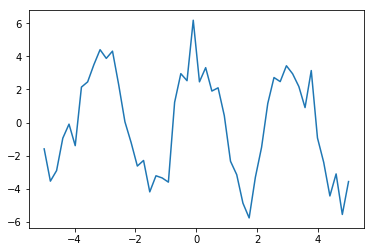

In [22]:
# 6
np.random.seed(0)
x_data = np.linspace(-5, 5, 50)
y_data = 4*np.cos(2*x_data) + np.random.normal(size=50)
plt.plot(x_data, y_data)
plt.show()

#### 7.실험 데이터로부터 위와 같은 모양의 파동 데이터 로그만을 수집했다고 가정하자. 해당 파동 데이터가 cos 함수로부터 생성됬을 때와 sin 함수로 생성됬을 때의 진폭과 주기를 각각 구해보시오.

In [42]:
# 7
from scipy import optimize
cos_parameter, cos_parameter_cov = optimize.curve_fit(lambda x, a, b: a*np.cos(b*x), x_data, y_data, p0=[2,2])
sin_parameter, sin_parameter_cov = optimize.curve_fit(lambda x, a, b: a*np.sin(b*x), x_data, y_data, p0=[2,2])

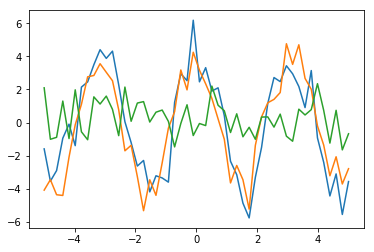

In [53]:
np.random.seed(0)
x_data = np.linspace(-5, 5, 50)
y_data = 4*np.cos(2*x_data) + np.random.normal(size=50)
plt.plot(x_data, y_data)
plt.plot(x_data, cos_parameter[0]*np.cos(cos_parameter[1]*x_data) + np.random.normal(size=50))
plt.plot(x_data, sin_parameter[0]*np.sin(sin_parameter[1]*x_data) + np.random.normal(size=50))
plt.show()


#### 8. A 중학교 1학년 1반과 1학년 2반 학생들의 몸무게를 측정한 결과가 아래와 같다. 두 반의 몸무게 분포의 기댓값이 동일한지를 검정하시오

In [56]:
class1 = [65.9, 53.6, 57.3, 59.3, 63.8, 59.2, 64.2, 75.0, 62.9]
class2 = [76.3, 82.1, 73.3, 69.3, 59.9, 72.1, 59.1, 86.8, 78.1]

In [70]:
t, p = stats.ttest_ind(class1, class2)
p
# p value < 0.05이므로 두 반의 몸무게 분포의 기댓값은 다르다. (유의수준 0.05 기준)

0.011074273265303296